(heavy_tails)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Heavy-Tailed Distributions

```{index} single: Heavy-tailed distributions
```

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon
!pip install --upgrade yfinance

We run the following code to prepare for the lecture:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe
from scipy.stats import norm
import yfinance as yf
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Overview

In this section we give some motivation for the lecture.

### Introduction: Light Tails

Most commonly used probability distributions in classical statistics and
the natural sciences have "light tails."

To explain this concept, let's look first at examples.

The classic example is the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), which has density

$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma} 
    \exp\left( -\frac{(x-\mu)^2}{2 \sigma^2} \right)
$$

on the real line $\mathbb R = (-\infty, \infty)$.

The two parameters $\mu$ and $\sigma$ are the mean and standard deviation
respectively.

As $x$ deviates from $\mu$, the value of $f(x)$ goes to zero extremely
quickly.

We can see this when we plot the density and show a histogram of observations,
as with the following code (which assumes $\mu=0$ and $\sigma=1$).

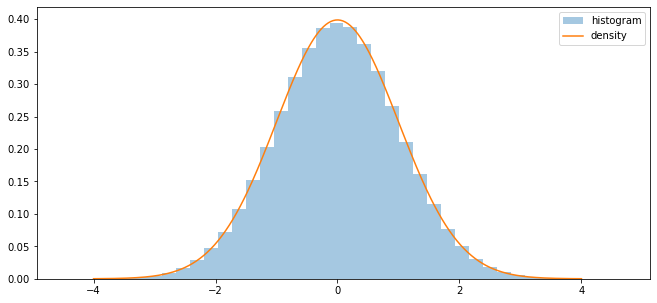

In [3]:
fig, ax = plt.subplots()
X = norm.rvs(size=1_000_000)
ax.hist(X, bins=40, alpha=0.4, label='histogram', density=True)
x_grid = np.linspace(-4, 4, 400)
ax.plot(x_grid, norm.pdf(x_grid), label='density')
ax.legend()
plt.show()

Notice how 

* the density's tails converge quickly to zero in both directions and
* even with 1,000,000 draws, we get no very large or very small observations.

We can see the last point more clearly by executing

In [4]:
X.min(), X.max()

(-4.476524261534734, 4.67262794080842)

Here's another view of draws from the same distribution:

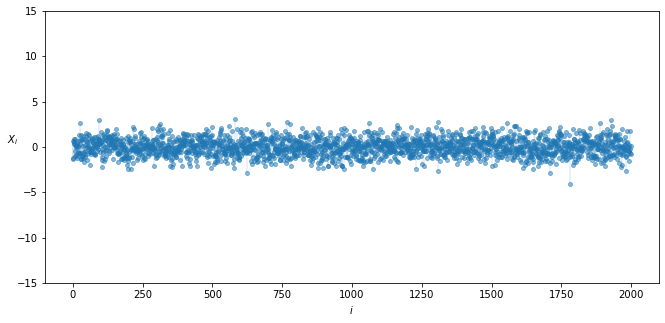

In [5]:
n = 2000
fig, ax = plt.subplots()
data = norm.rvs(size=n)
ax.plot(list(range(n)), data, linestyle='', marker='o', alpha=0.5, ms=4)
ax.vlines(list(range(n)), 0, data, lw=0.2)
ax.set_ylim(-15, 15)
ax.set_xlabel('$i$')
ax.set_ylabel('$X_i$', rotation=0)
plt.show()

We have plotted each individual draw $X_i$ against $i$.

None are very large or very small.

In other words, extreme observations are rare and draws tend not to deviate
too much from the mean.

As a result, many statisticians and econometricians 
use rules of thumb such as "outcomes more than four or five
standard deviations from the mean can safely be ignored."


### When Are Light Tails Valid?

Distributions that rarely generate extreme values are called light-tailed.

For example, human height is light-tailed.

Yes, it's true that we see some very tall people.

* For example, basketballer [Sun Mingming](https://en.wikipedia.org/wiki/Sun_Mingming) is 2.32 meters tall

But have you ever heard of someone who is 20 meters tall?  Or 200?  Or 2000? 

Have you ever wondered why not? 

After all, there are 8 billion people in the world!

In essence, the reason we don't see such draws is that the distribution of
human high has very light tails.

In fact human height is approximately normally distributed.


### Returns on Assets


But now we have to ask: does economic data always look like this?

Let's look at some financial data first.

Our aim is to plot the daily change in the price of Amazon (AMZN) stock for
the period from 1st January 2015 to 1st July 2022.

This equates to daily returns if we set dividends aside.

The code below produces the desired plot using Yahoo financial data via the `yfinance` library.

[*********************100%***********************]  1 of 1 completed

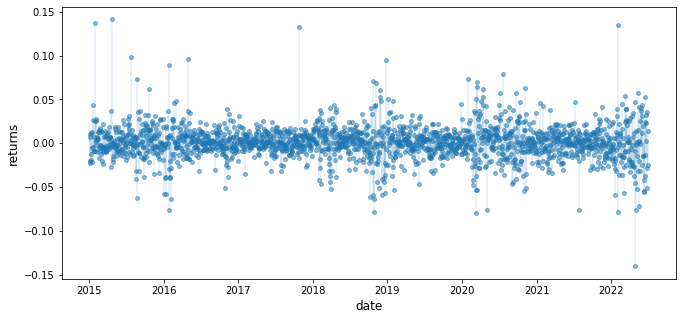

In [6]:
s = yf.download('AMZN', '2015-1-1', '2022-7-1')['Adj Close']
r = s.pct_change()

fig, ax = plt.subplots()

ax.plot(r, linestyle='', marker='o', alpha=0.5, ms=4)
ax.vlines(r.index, 0, r.values, lw=0.2)
ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

This data looks different to the draws from the normal distribution.

Several of observations are quite extreme.

We get a similar picture if we look at other assets, such as Bitcoin

[*********************100%***********************]  1 of 1 completed

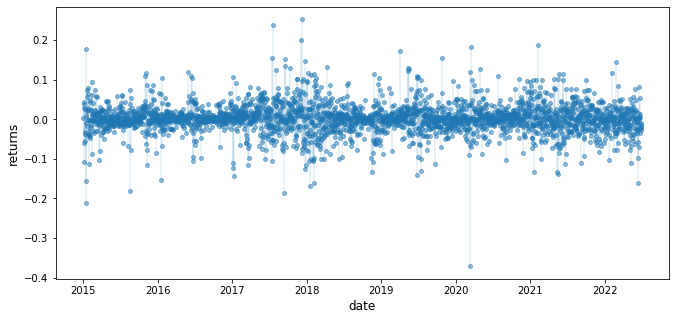

In [7]:
s = yf.download('BTC-USD', '2015-1-1', '2022-7-1')['Adj Close']
r = s.pct_change()

fig, ax = plt.subplots()

ax.plot(r, linestyle='', marker='o', alpha=0.5, ms=4)
ax.vlines(r.index, 0, r.values, lw=0.2)
ax.set_ylabel('returns', fontsize=12)
ax.set_xlabel('date', fontsize=12)

plt.show()

The histogram also looks different to the histogram of the normal
distribution:

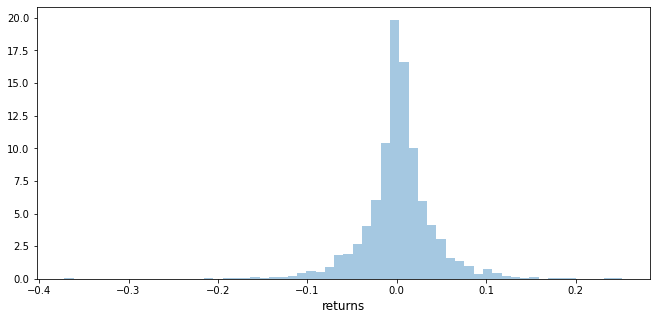

In [8]:
fig, ax = plt.subplots()
ax.hist(r, bins=60, alpha=0.4, label='bitcoin returns', density=True)
ax.set_xlabel('returns', fontsize=12)
plt.show()

If we look at higher frequency returns data (e.g., tick-by-tick), we often see even more
extreme observations.

See, for example, {cite}`mandelbrot1963variation` or {cite}`rachev2003handbook`.


### Other Data

The data we have just seen is said to be "heavy-tailed".

With heavy-tailed distributions, extreme outcomes occur relatively
frequently.

(A more careful definition is given below)

Importantly, there are many examples of heavy-tailed distributions
observed in economic and financial settings include

For example, the income and the wealth distributions are heavy-tailed (see, e.g., {cite}`pareto1896cours`, {cite}`benhabib2018skewed`).

* You can imagine this: most people have low or modest wealth but some people
  are extremely rich.

The firm size distribution is also heavy-tailed ({cite}`axtell2001zipf`, {cite}`gabaix2016power`}).

* You can imagine this too: most firms are small but some firms are enormous.

The distribution of town and city sizes is heavy-tailed ({cite}`rozenfeld2011area`, {cite}`gabaix2016power`).

* Most towns and cities are small but some are very large.


### Why Should We Care?

Heavy tails are common in economic data but does that mean they are important?

The answer to this question is affirmative!

When distributions are heavy-tailed, we need to think carefully about issues
like

* diversification and risk
* forecasting
* taxation (across a heavy-tailed income distribution), etc.

We return to these points below.



## Visual Comparisons

Let's do some more visual comparisons to help us build intuition on the
difference between light and heavy tails.


The figure below shows a simulation.  (You will be asked to replicate it in
the exercises.)

The top two subfigures each show 120 independent draws from the normal
distribution, which is light-tailed.

The bottom subfigure shows 120 independent draws from [the Cauchy
distribution](https://en.wikipedia.org/wiki/Cauchy_distribution), which is
heavy-tailed.

(light_heavy_fig1)=
```{figure} /_static/lecture_specific/heavy_tails/light_heavy_fig1.png

```

In the top subfigure, the standard deviation of the normal distribution is 2,
and the draws are clustered around the mean.

In the middle subfigure, the standard deviation is increased to 12 and, as
expected, the amount of dispersion rises.

The bottom subfigure, with the Cauchy draws, shows a different pattern: tight
clustering around the mean for the great majority of observations, combined
with a few sudden large deviations from the mean.

This is typical of a heavy-tailed distribution.



(cltail)=
## Classifying Tail Properties

To keep our discussion precise, we need some definitions concerning tail
properties.

We will focus our attention on the right hand tails of
nonnegative random variables and their distributions.

The definitions for
left hand tails are very similar and we omit them to simplify the exposition.

### Light and Heavy Tails

A distribution $F$ with density $f$ on $\mathbb R_+$ is called **heavy-tailed** if

```{math}
:label: defht

\int_0^\infty \exp(tx) f(x) dx = \infty \; \text{ for all } t > 0.
```

We say that a nonnegative random variable $X$ is **heavy-tailed** if its density is heavy-tailed.

This is equivalent to stating that its **moment generating function** $m(t) :=
\mathbb E \exp(t X)$ is infinite for all $t > 0$.

For example, the [log-normal
distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) is
heavy-tailed because its moment generating function is infinite everywhere on
$(0, \infty)$.

A distribution $F$ on $\mathbb R_+$ is called **light-tailed** if it is not heavy-tailed.

A nonnegative random variable $X$ is **light-tailed** if its distribution $F$ is light-tailed.

For example, every random variable with bounded support is light-tailed. (Why?)

As another example, if $X$ has the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution), with cdf $F(x) = 1 - \exp(-\lambda x)$ for some $\lambda > 0$, then its moment generating function is 

$$ m(t) = \frac{\lambda}{\lambda - t} \quad \text{when } t < \lambda $$

In particular, $m(t)$ is finite whenever $t < \lambda$, so $X$ is light-tailed.

One can show that if $X$ is light-tailed, then all of its
[moments](https://en.wikipedia.org/wiki/Moment_(mathematics)) are finite.

Conversely, if some moment is infinite, then $X$ is heavy-tailed.

The latter condition is not necessary, however.

For example, the lognormal distribution is heavy-tailed but every moment is finite.



### Pareto Tails

One specific class of heavy-tailed distributions has been found repeatedly in
economic and social phenomena: the class of so-called power laws.

Specifically, given $\alpha > 0$, a nonnegative random variable $X$ is said to
have a **Pareto tail** with **tail index** $\alpha$ if

```{math}
:label: plrt

\lim_{x \to \infty} x^\alpha \, \mathbb P\{X > x\} = c.
```

The limit {eq}`plrt` implies the existence of positive constants $b$ and $\bar x$ such that $\mathbb P\{X > x\} \geq b x^{- \alpha}$ whenever $x \geq \bar x$.

The implication is that $\mathbb P\{X > x\}$ converges to zero no faster than $x^{-\alpha}$.

In some sources, a random variable obeying {eq}`plrt` is said to have a **power law tail**.

One example is the [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution). 

If $X$ has the Pareto distribution, then there are positive constants $\bar x$
and $\alpha$ such that

```{math}
:label: pareto

\mathbb P\{X > x\} =
\begin{cases}
    \left( \bar x/x \right)^{\alpha}
        & \text{ if } x \geq \bar x
    \\
    1
        & \text{ if } x < \bar x
\end{cases}
```

It is easy to see that $\mathbb P\{X > x\}$ satisfies {eq}`plrt`.

Thus, in line with the terminology, Pareto distributed random variables have a Pareto tail.


### Rank-Size Plots

One graphical technique for investigating Pareto tails and power laws is the so-called **rank-size plot**.

This kind of figure plots log size against log rank of the population (i.e.,
location in the population when sorted from smallest to largest).

Often just the largest 5% or 10% of observations are plotted.

For a sufficiently large number of draws from a Pareto distribution, the plot
generates a straight line. For distributions with thinner tails, the data
points are concave.

A discussion of why this occurs can be found in {cite}`nishiyama2004estimation`.

The figure below provides one example, using simulated data.

The rank-size plots shows draws from three different distributions: folded normal, chi-squared with 1 degree of freedom and Pareto.

The Pareto sample produces a straight line, while the lines produced by the other samples are concave.

You are asked to reproduce this figure in the exercises.

(rank_size_fig1)=
```{figure} /_static/lecture_specific/heavy_tails/rank_size_fig1.png

```



## Failure of the LLN

One impact of heavy tails is that sample averages can be poor estimators of
the underlying mean of the distribution.

To understand this point better, recall {doc}`our earlier discussion <lln_clt>` 
of the Law of Large Numbers, which considered IID $X_1, \ldots, X_n$ with common distribution $F$

If $\mathbb E |X_i|$ is finite, then
the sample mean $\bar X_n := \frac{1}{n} \sum_{i=1}^n X_i$ satisfies

```{math}
:label: lln_as2

\mathbb P \left\{ \bar X_n \to \mu \text{ as } n \to \infty \right\} = 1
```

where $\mu := \mathbb E X_i = \int x F(dx)$ is the common mean of the sample.

The condition $\mathbb E | X_i | = \int |x| F(dx) < \infty$ holds
in most cases but can fail if the distribution $F$ is very heavy tailed.

For example, it fails for the Cauchy distribution.

Let's have a look at the behavior of the sample mean in this case, and see
whether or not the LLN is still valid.

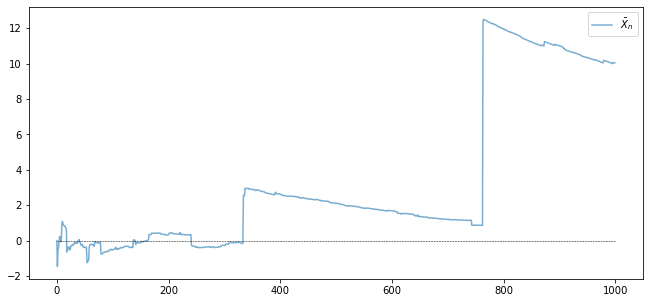

In [9]:
from scipy.stats import cauchy

np.random.seed(1234)
N = 1_000

distribution = cauchy()

fig, ax = plt.subplots()
data = distribution.rvs(N)

# Compute sample mean at each n
sample_mean = np.empty(N)
for n in range(1, N):
    sample_mean[n] = np.mean(data[:n])

# Plot
ax.plot(range(N), sample_mean, alpha=0.6, label='$\\bar{X}_n$')

ax.plot(range(N), np.zeros(N), 'k--', lw=0.5)
ax.legend()

plt.show()

The sequence shows no sign of converging.

Will convergence occur if we take $n$ even larger?

The answer is no.

To see this, recall that the [characteristic function](https://en.wikipedia.org/wiki/Characteristic_function_%28probability_theory%29) of the Cauchy distribution is

```{math}
:label: lln_cch

\phi(t) = \mathbb E e^{itX} = \int e^{i t x} f(x) dx = e^{-|t|}
```

Using independence, the characteristic function of the sample mean becomes

$$
\begin{aligned}
    \mathbb E e^{i t \bar X_n }
    & = \mathbb E \exp \left\{ i \frac{t}{n} \sum_{j=1}^n X_j \right\}
    \\
    & = \mathbb E \prod_{j=1}^n \exp \left\{ i \frac{t}{n} X_j \right\}
    \\
    & = \prod_{j=1}^n \mathbb E \exp \left\{ i \frac{t}{n} X_j \right\}
    = [\phi(t/n)]^n
\end{aligned}
$$

In view of {eq}`lln_cch`, this is just $e^{-|t|}$.

Thus, in the case of the Cauchy distribution, the sample mean itself has the very same Cauchy distribution, regardless of $n$!

In particular, the sequence $\bar X_n$ does not converge to any point.




## Why Do Heavy Tails Matter?

We have now seen that 

1. heavy tails are frequent in economics and
2. the Law of Large Numbers fails when tails are very heavy.

But what about in the real world?  Do heavy tails matter?

Let's briefly discuss why they do.


### Diversification

One of the most important ideas in investing is using diversification to
reduce risk.

This is a very old idea --- consider, for example, the expression "don't put all your eggs in one basket".

To illustrate, consider an investor with one dollar of wealth and a choice over
$n$ assets with payoffs $X_1, \ldots, X_n$.  

Suppose that returns on distinct  assets are
independent and each return has  mean $\mu$ and variance $\sigma^2$.

If the investor puts all wealth in one asset, say, then the expected payoff of the
portfolio is $\mu$ and the variance is $\sigma^2$.  

If instead the investor puts share $1/n$ of her wealth in each asset, then the portfolio payoff is

$$ Y_n = \sum_{i=1}^n \frac{X_i}{n} = \frac{1}{n} \sum_{i=1}^n X_i. $$  

Try computing the mean and variance.

You will find that

* The mean is unchanged at $\mu$, while 
* the variance of the portfolio has fallen to $\sigma^2 / n$.

Diversification reduces risk, as expected.

But there is a hidden assumption here: the variance is of returns is finite.

If the distribution is heavy-tailed and the variance is infinite, then this
logic is incorrect.

For example, we saw above that if every $X_i$ is Cauchy, then so is $Y_n$.

This means that diversification doesn't help at all!


### Fiscal Policy

The heaviness of the tail in the wealth distribution matters for taxation and redistribution policies.

The same is true for the income distribution.

For example, the heaviness of the tail of the income distribution helps
determine how much revenue a given tax policy will raise.



### Other Implications

There are in fact many important implications for heavy tails.

For example, heavy tails in income and wealth affect productivity growth, business cycles, and political economy.

For further reading, see, for example, {cite}`acemoglu2002political`, {cite}`glaeser2003injustice`, {cite}`bhandari2018inequality` or {cite}`ahn2018inequality`.



## Exercises

```{exercise}
:label: ht_ex1

Replicate {ref}`the figure presented above <light_heavy_fig1>` that compares normal and Cauchy draws.

Use `np.random.seed(11)` to set the seed.
```


```{exercise}
:label: ht_ex2

Prove: If $X$ has a Pareto tail with tail index $\alpha$, then
$\mathbb E[X^r] = \infty$ for all $r \geq \alpha$.
```


```{exercise}
:label: ht_ex3

Repeat exercise 1, but replace the three distributions (two normal, one
Cauchy) with three Pareto distributions using different choices of
$\alpha$.

For $\alpha$, try 1.15, 1.5 and 1.75.

Use `np.random.seed(11)` to set the seed.
```


```{exercise}
:label: ht_ex4

Replicate the rank-size plot figure {ref}`presented above <rank_size_fig1>`.

If you like you can use the function `qe.rank_size` from the `quantecon` library to generate the plots.

Use `np.random.seed(13)` to set the seed.
```

```{exercise}
:label: ht_ex5

There is an ongoing argument about whether the firm size distribution should
be modeled as a Pareto distribution or a lognormal distribution (see, e.g.,
{cite}`fujiwara2004pareto`, {cite}`kondo2018us` or {cite}`schluter2019size`).

This sounds esoteric but has real implications for a variety of economic
phenomena.

To illustrate this fact in a simple way, let us consider an economy with
100,000 firms, an interest rate of `r = 0.05` and a corporate tax rate of
15%.

Your task is to estimate the present discounted value of projected corporate
tax revenue over the next 10 years.

Because we are forecasting, we need a model.

We will suppose that

1. the number of firms and the firm size distribution (measured in profits) remain fixed and
1. the firm size distribution is either lognormal or Pareto.

Present discounted value of tax revenue will be estimated by

1. generating 100,000 draws of firm profit from the firm size distribution,
1. multiplying by the tax rate, and
1. summing the results with discounting to obtain present value.

The Pareto distribution is assumed to take the form {eq}`pareto` with $\bar x = 1$ and $\alpha = 1.05$.

(The value the tail index $\alpha$ is plausible given the data {cite}`gabaix2016power`.)

To make the lognormal option as similar as possible to the Pareto option, choose its parameters such that the mean and median of both distributions are the same.

Note that, for each distribution, your estimate of tax revenue will be random because it is based on a finite number of draws.

To take this into account, generate 100 replications (evaluations of tax revenue) for each of the two distributions and compare the two samples by

* producing a [violin plot](https://en.wikipedia.org/wiki/Violin_plot) visualizing the two samples side-by-side and
* printing the mean and standard deviation of both samples.

For the seed use `np.random.seed(1234)`.

What differences do you observe?

(Note: a better approach to this problem would be to model firm dynamics and
try to track individual firms given the current distribution.  We will discuss
firm dynamics in later lectures.)
```

## Solutions

```{solution-start} ht_ex1
:class: dropdown
```

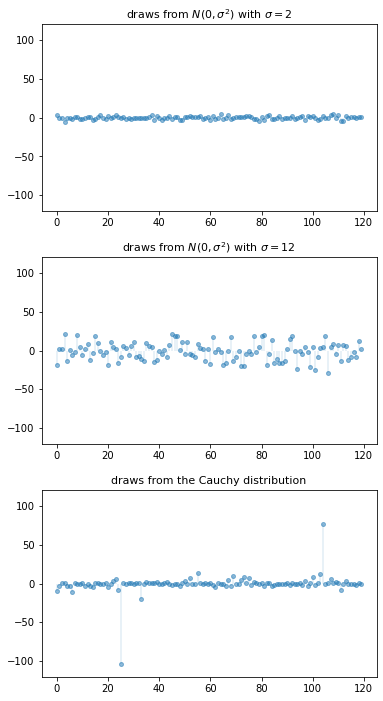

In [10]:
n = 120
np.random.seed(11)

fig, axes = plt.subplots(3, 1, figsize=(6, 12))

for ax in axes:
    ax.set_ylim((-120, 120))

s_vals = 2, 12

for ax, s in zip(axes[:2], s_vals):
    data = np.random.randn(n) * s
    ax.plot(list(range(n)), data, linestyle='', marker='o', alpha=0.5, ms=4)
    ax.vlines(list(range(n)), 0, data, lw=0.2)
    ax.set_title(f"draws from $N(0, \sigma^2)$ with $\sigma = {s}$", fontsize=11)

ax = axes[2]
distribution = cauchy()
data = distribution.rvs(n)
ax.plot(list(range(n)), data, linestyle='', marker='o', alpha=0.5, ms=4)
ax.vlines(list(range(n)), 0, data, lw=0.2)
ax.set_title(f"draws from the Cauchy distribution", fontsize=11)

plt.subplots_adjust(hspace=0.25)

plt.show()

```{solution-end}
```


```{solution-start} ht_ex2
:class: dropdown

Let $X$ have a Pareto tail with tail index $\alpha$ and let $F$ be its cdf.

Fix $r \geq \alpha$.

As discussed after {eq}`plrt`, we can take positive constants $b$ and $\bar x$ such that

$$
\mathbb P\{X > x\} \geq b x^{- \alpha} \text{ whenever } x \geq \bar x
$$

But then

$$
\mathbb E X^r = r \int_0^\infty x^{r-1} \mathbb P\{ X > x \} x
\geq
r \int_0^{\bar x} x^{r-1} \mathbb P\{ X > x \} x
+ r \int_{\bar x}^\infty  x^{r-1} b x^{-\alpha} x.
$$

We know that $\int_{\bar x}^\infty x^{r-\alpha-1} x = \infty$ whenever $r - \alpha - 1 \geq -1$.

Since $r \geq \alpha$, we have $\mathbb E X^r = \infty$.
```


```{solution-end}
```

```{solution-start} ht_ex3
:class: dropdown
```

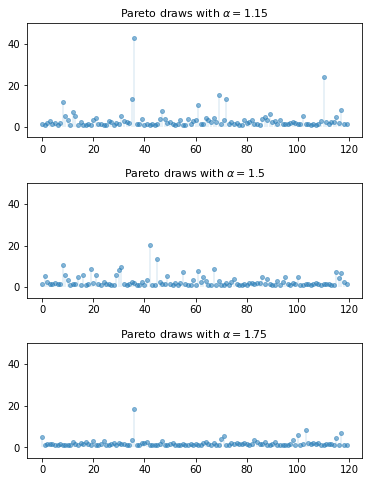

In [11]:
from scipy.stats import pareto

np.random.seed(11)

n = 120
alphas = [1.15, 1.50, 1.75]

fig, axes = plt.subplots(3, 1, figsize=(6, 8))

for (a, ax) in zip(alphas, axes):
    ax.set_ylim((-5, 50))
    data = pareto.rvs(size=n, scale=1, b=a)
    ax.plot(list(range(n)), data, linestyle='', marker='o', alpha=0.5, ms=4)
    ax.vlines(list(range(n)), 0, data, lw=0.2)
    ax.set_title(f"Pareto draws with $\\alpha = {a}$", fontsize=11)

plt.subplots_adjust(hspace=0.4)

plt.show()

```{solution-end}
```


```{solution-start} ht_ex4
:class: dropdown
```

First let's generate the data for the plots:

In [12]:
sample_size = 1000
np.random.seed(13)
z = np.random.randn(sample_size)

data_1 = np.abs(z)
data_2 = np.exp(z)
data_3 = np.exp(np.random.exponential(scale=1.0, size=sample_size))

data_list = [data_1, data_2, data_3]

Now we plot the data:

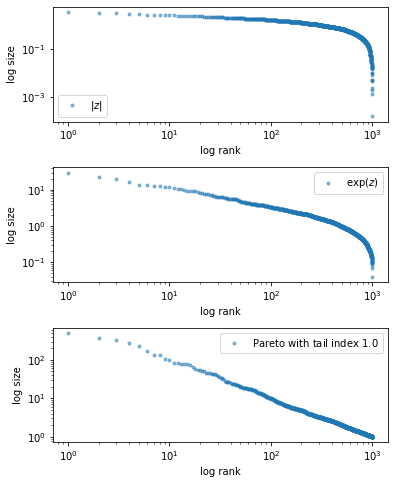

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
axes = axes.flatten()
labels = ['$|z|$', '$\exp(z)$', 'Pareto with tail index $1.0$']

for data, label, ax in zip(data_list, labels, axes):

    rank_data, size_data = qe.rank_size(data)

    ax.loglog(rank_data, size_data, 'o', markersize=3.0, alpha=0.5, label=label)
    ax.set_xlabel("log rank")
    ax.set_ylabel("log size")

    ax.legend()

fig.subplots_adjust(hspace=0.4)

plt.show()

```{solution-end}
```



```{solution-start} ht_ex5
:class: dropdown
```

To do the exercise, we need to choose the parameters $\mu$
and $\sigma$ of the lognormal distribution to match the mean and median
of the Pareto distribution.

Here we understand the lognormal distribution as that of the random variable
$\exp(\mu + \sigma Z)$ when $Z$ is standard normal.

The mean and median of the Pareto distribution {eq}`pareto` with
$\bar x = 1$ are

$$
\text{mean } = \frac{\alpha}{\alpha - 1}
\quad \text{and} \quad
\text{median } = 2^{1/\alpha}
$$

Using the corresponding expressions for the lognormal distribution leads us to
the equations

$$
\frac{\alpha}{\alpha - 1} = \exp(\mu + \sigma^2/2)
\quad \text{and} \quad
2^{1/\alpha} = \exp(\mu)
$$

which we solve for $\mu$ and $\sigma$ given $\alpha = 1.05$.

Here is code that generates the two samples, produces the violin plot and
prints the mean and standard deviation of the two samples.

In [14]:
num_firms = 100_000
num_years = 10
tax_rate = 0.15
r = 0.05

β = 1 / (1 + r)    # discount factor

x_bar = 1.0
α = 1.05

def pareto_rvs(n):
    "Uses a standard method to generate Pareto draws."
    u = np.random.uniform(size=n)
    y = x_bar / (u**(1/α))
    return y

Let's compute the lognormal parameters:

In [15]:
μ = np.log(2) / α
σ_sq = 2 * (np.log(α/(α - 1)) - np.log(2)/α)
σ = np.sqrt(σ_sq)

Here's a function to compute a single estimate of tax revenue for a particular
choice of distribution `dist`.

In [16]:
def tax_rev(dist):
    tax_raised = 0
    for t in range(num_years):
        if dist == 'pareto':
            π = pareto_rvs(num_firms)
        else:
            π = np.exp(μ + σ * np.random.randn(num_firms))
        tax_raised += β**t * np.sum(π * tax_rate)
    return tax_raised

Now let's generate the violin plot.

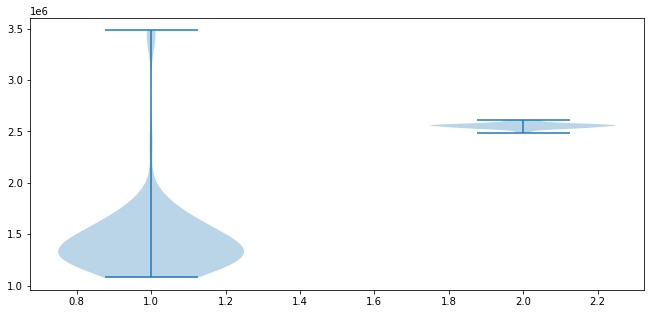

In [17]:
num_reps = 100
np.random.seed(1234)

tax_rev_lognorm = np.empty(num_reps)
tax_rev_pareto = np.empty(num_reps)

for i in range(num_reps):
    tax_rev_pareto[i] = tax_rev('pareto')
    tax_rev_lognorm[i] = tax_rev('lognorm')

fig, ax = plt.subplots()

data = tax_rev_pareto, tax_rev_lognorm

ax.violinplot(data)

plt.show()

Finally, let's print the means and standard deviations.

In [18]:
tax_rev_pareto.mean(), tax_rev_pareto.std()

(1.4587290546623734e+06, 406089.3613661567)

In [19]:
tax_rev_lognorm.mean(), tax_rev_lognorm.std()

(2556174.8615230713, 25586.44456513965)

Looking at the output of the code, our main conclusion is that the Pareto
assumption leads to a lower mean and greater dispersion.

```{solution-end}
```